# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

# Import Data

In [4]:
# importing data
df = pd.read_csv(r'/Users/madelinegamache/Documents/Achievement 6/kc_clean.csv', index_col = False)

In [6]:
# Checking output
df.head()

,Unnamed: 0,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,0,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,1,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,2,180000.0,2,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,3,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,4,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


# Clean Data

In [7]:
# dropping 'Unnamed: 0' column
df = df.drop(['Unnamed: 0'],axis=1)

In [8]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,18


In [9]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day'],
      dtype='object')

In [10]:
df.shape

(20939, 22)

In [11]:
# Check for missing values

df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
month            0
day              0
dtype: int64

In [12]:
# Checking for duplicates
dups = df.duplicated()

In [13]:
dups.shape # No dups

(20939,)

/var/folders/rq/rlwph4v905106c0cxk8lydqr0000gn/T/ipykernel_54640/3695632551.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], bins=55)


<Axes: xlabel='price', ylabel='Density'>

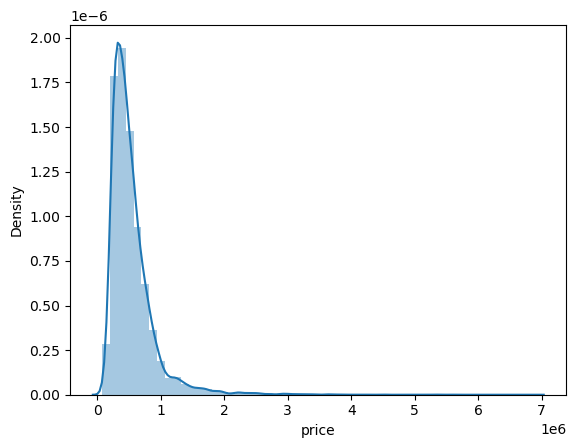

In [16]:
# Checking for extreme values
sns.distplot(df['price'], bins=55) 

In [17]:
# Check the mean
df['price'].mean() 

535313.5464444339

In [18]:
# Check the median
df['price'].median()

449250.0

In [19]:
# Check the max
df['price'].max()

6885000.0

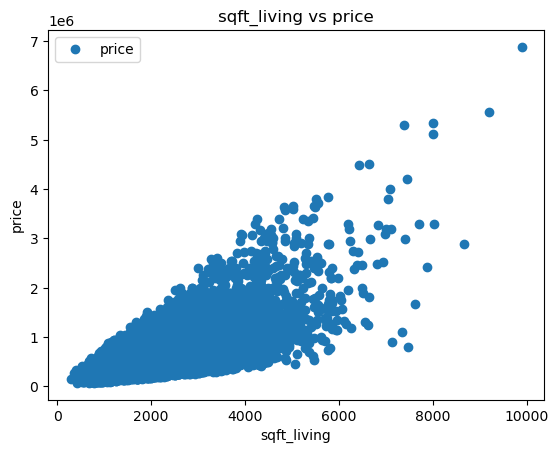

In [21]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_living', y='price',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('sqft_living vs price')  
plt.xlabel('sqft_living')  
plt.ylabel('price')  
plt.show()

# Hypothesis:
If the size of the living area (sqft_living) increases, then the selling price of houses in King County, WA will also increase.

In [22]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_living'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [23]:
X

array([[1180],
       [2570],
       [ 770],
       ...,
       [1020],
       [1600],
       [1020]])

In [24]:
y

array([[221900.],
       [538000.],
       [180000.],
       ...,
       [402101.],
       [400000.],
       [325000.]])

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [26]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

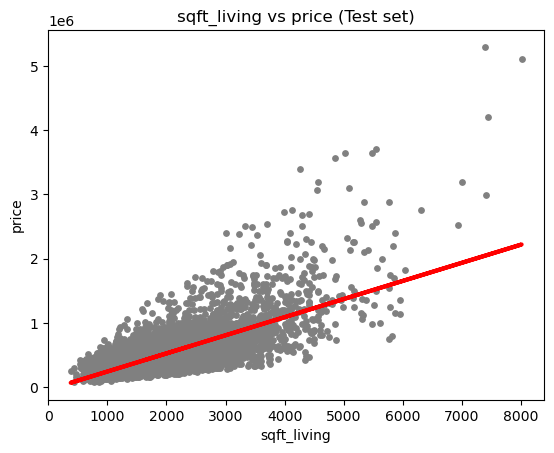

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('sqft_living vs price (Test set)')
plot_test.xlabel('sqft_living')
plot_test.ylabel('price')
plot_test.show()

### Interpreting Regression:
This line indicates a positive slope, therefor there is a positive relationship between sqft_living and price. The positive relationship explains that the larger the sqft_living is, the price of the house will go up. However, this line does not come close to covering all the data points, so there are still many data points that contradict the hypothesis. Also, the mean squared error is quite large. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [31]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[282.55693227]]
Mean squared error:  64022868529.39422
R2 score:  0.485399715071099


In [32]:
y_predicted

array([[430182.00455973],
       [743820.19938092],
       [418879.72726888],
       ...,
       [288903.53842406],
       [692959.95157208],
       [627971.85714967]])

In [33]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,700000.0,4.301820e+05
1,533380.0,7.438202e+05
2,415000.0,4.188797e+05
3,248500.0,3.397638e+05
4,575000.0,4.499610e+05
5,219000.0,5.036468e+05
6,830000.0,7.212156e+05
7,269000.0,5.064724e+05
8,475000.0,4.866934e+05
9,1080000.0,1.054633e+06


Immediately, it is evident that there exists a significant contrast between the observed and estimated y values. This observation further supports the notion that the model is inadequate in explaining the connection between the variables "sqft_living" and "price". The relationship between these variables does not conform to a singular, linear regression line.

We can confirm that the hypothesis is only partially true, and there is a lot of other variance indicating the price of a house in King County, WA. 